In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

# 10. 机器学习精要：你的烤箱在学习吗
本章的主要内容有：
+ 了解机器学习的分类，并学习相关案例
+ 介绍回归、聚类等机器学习模型
+ 定义机器学习，以及如何在数据科学中使用它
+ 机器学习和统计模型的区别，以及为什么机器学习的范围比统计模型更广

我们的目标是运用统计学、概率论和算法思维，将机器学习能力应用到实际生产环境中。本章将从全局视角介绍机器学习和一个统计模型。我们还将介绍各种指标，因为指标反映了模型的有效性。我们需要借助指标才能得出结论，进而使用机器学习进行预测。

## 10.1 什么是机器学习
`机器学习`是赋予机器从数据中学习的能力，而不需要程序员给出明确的规则的模型。机器学习关注的是从数据中学习模式(pattern)即便数据本身存在错误(噪声)。

> 机器学习模型可以直接从数据中发现知识，而无需人类的帮助。这是传统算法和机器学习模型最根本的区别。传统算法被告知如何从复杂系统中发现答案，算法将从中搜索最佳结果，它的速度远远高于人类。然而，传统算法最大的缺点在于人类必须首先知道最佳解决方案是什么。而对于机器学习算法，人类不需要事先告诉模型最佳解决方案，相反，我们提供该问题的几个例子，由模型本身找出答案。

机器学习是数据科学家工作箱中一个重要工具，它和统计检验方法、使用概率论/统计学预测总体参数一样重要。机器学习经常被误认为是数据科学家唯一需要掌握的能力，这是不真实的。**真正的数据科学家既要懂得何时使用机器学习模型，也要懂得何时不使用机器学习模型**。

机器学习是关于相关性和关系的游戏。很多机器学习算法擅长发现数据集中潜在的关系。一旦机器学习算法能够精确地找出数据间的相关性，我们就能利用这些相关性预测未来的观测值或者生成数据，并展示有意思的数据模式。

讲解机器学习最好的方法是通过案例，并配以两种解决方案：一种使用机器学习算法，另一种使用传统的非机器学习算法。

##### 案例：面部识别
`面部识别`(facial recognition)问题非常简单。给定一张照片，识别出它是否是人脸。在回答这个问题之前，我们还有更重要的问题需要回答。假设你希望开发一套家庭安全系统，识别哪些人进入了房间。我们假设大部分时间都没有人进入房子，只有当面部识别系统识别出人脸时才开门。这就是我们需要解决的问题—给定一张照片，判断是否是人脸。

对于面部识别问题，有以下两套解决方案。
+ 对于非机器学习算法，我们需要首先将人脸定义为略圆、有两个眼睛、有头发、有鼻子等。算法从照片中识别这些硬编码特征，然后返回是否具有以上特征
+ 对于机器学习算法，只需要输入一些含有标签的人脸和非人脸照片，模型将从输入的照片中自动找出人脸的规律

## 10.2 机器学习并不完美
虽然不同的模型在使用时各不相同，但仍然有一些通用的规则，以下是使用机器学习时的告诫。
+ 大多数时候，模型使用的是预处理和清洗后的数据。基本上没有模型能够建立在含有大量缺失数据值或分类信息的脏数据之上。通常我们需要先使用哑变量和填充/删除等技术处理这些异常现象
+ 在清洗后的数据集中，每一行表示被观测环境中唯一的观测对象
+ 当使用模型寻找变量间的关系时，我们会假设这些变量存在着某种关系。这一假设前提非常重要，机器学习模型无法处理不存在任何关系的数据
+ 机器学习模型通常是半自动化的，这意味着聪明的决策还是需要由人给出。机器虽然非常聪明，但很难将结果用文本展示。大多数模型的输出都是一系列数字和指标，指标显示了模型的质量。模型依赖于人将这些数字和指标转换为观点，并将观点传达给听众
+ 大部分机器学习模型都对噪声数据(noisy data)非常敏感。这意味着如果数据集中含有非相关数据，将会迷惑模型

这些告诫将在使用机器学习模型时一次又一次的出现，它们至关重要，却经常被新手忽略。

## 10.3 机器学习如何工作
虽然每一种机器学习算法和模型都各不相同，使用不同的数学原理，适用不同的数据科学分析场景，但它们的原理是相通的。通常来讲，机器学习的工作原理是输入数据、寻找数据中的关系、输出模型学习到的规律。

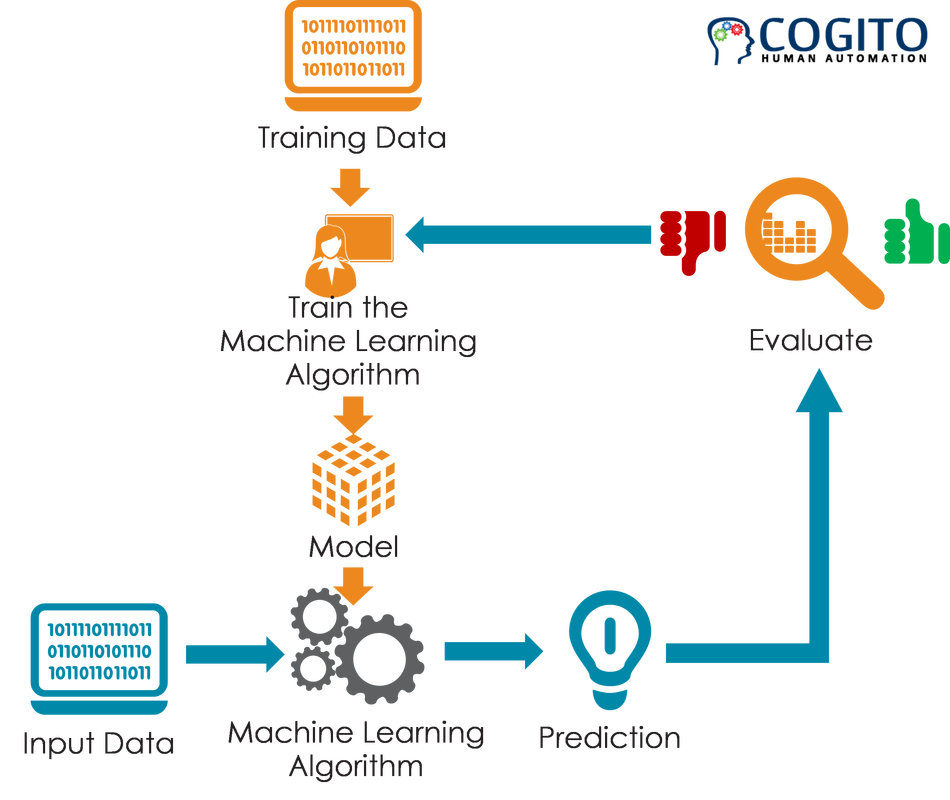

## 10.4 机器学习的分类
机器学习模型可以根据不同的特征进行分类：
+ 根据使用的数据结构进行分类(树/图/神经网络)
+ 根据使用的数学理论进行分类(统计学/概率论)
+ 根据训练所需的计算层次进行分类(深度学习)

从宏观角度看机器学习模型，主要分为以下3类：
+ 监督学习(supervisedlearning)
+ 无监督学习(unsupervisedlearning)
+ 强化学习(reinforcementlearning)

### 10.4.1 监督学习
`监督学习`的目的是寻找数据集中各个特征和目标变量之间的关系。比如，监督学习模型可以根据一个人的健康特征(心率、肥胖水平等)，计算此人患有心脏病的风险(目标变量)。

特征和目标变量之间隐含的关系，使得机器学习模型可以依据历史数据进行预测。监督机器学习模型通常被称为`预测分析模型`(predictive analytics models)，因为它能根据历史数据预测未来。

监督机器学习模型需要输入`有标记数据`(labeled data)，我们必须通过被正确标记的历史案例对模型进行训练。

总之，监督学习使用历史数据对未来进行预测。在使用模型之前，我们需要将数据分为两部分：
+ `预测因子`(predictors)：指用于进行预测的列，有时也被称为`特征`(features)、输入变量或自变量(independent variables)
+ `响应值`(response)：指需要进行预测的列，有时也被称为`输出`、`标签`、`目标`或`因变量`(dependent variables)

监督学习模型尝试寻找预测因子和响应值之间的关系，然后进行预测。模型的核心思想是未来的观测值可以自我表示，因此我们只需要知道预测因子，模型就可以根据预测因子对响应值做出准确的预测。

##### 案例：心脏病预测
假设我们想预测未来一年某人是否会患有心脏病。为了进行预测，我们需要收集他的胆固醇指标、血压、身高、吸烟习惯等信息。根据以上信息，我们能够计算他患有心脏病的可能性。为了进行预测，我们需要研究历史患者和他们的病历。对于历史患者，我们不仅知道他们的预测因子(胆固醇含量、血压值等健康特征)，还知道他们是否患有心脏病(因为是历史事件）。

随着模型接触越来越多的有标签数据，它将进行自我调整。我们可以使用不同的指标评估监督学习模型的效果，并对它进行优化。

监督学习模型的一个最大的缺点是需要有标记数据，而这些数据通常很难获取。如果我们想预测心脏病，就需要成千上万患者的医疗信息，以及很多年持续的追踪。

简而言之，监督学习模型根据有标记的历史数据对未来进行预测，潜在的应用场景包括：
+ 股票价格预测
+ 天气预测
+ 犯罪预测

请注意，以上潜在应用场景都包含`预测`一词，这恰恰说明了监督学习在预测方面的能力，但是预测并不是监督学习的全部。

`图10.4`生动描绘了监督学习模型如何使用有标记数据训练自己、调整自己并进行预测：
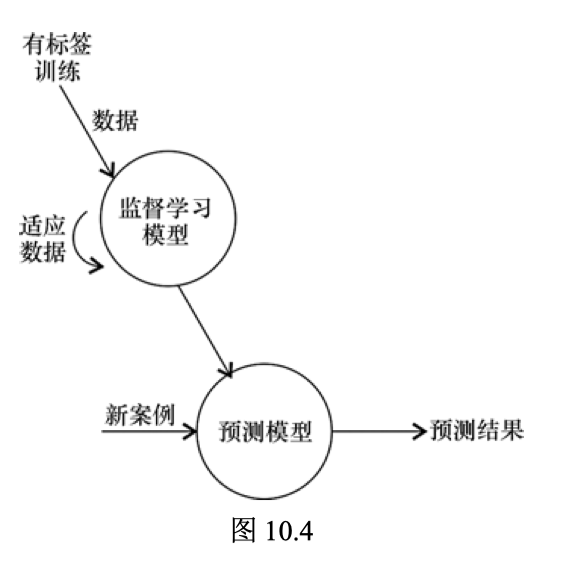

##### 不仅仅是预测
监督学习利用预测因子和响应值之间的关系进行预测，但有时我们只需要知道指标间的关系就足够了。假设我们用监督学习模型预测客户是否会购买指定产品，数据集如表所示：
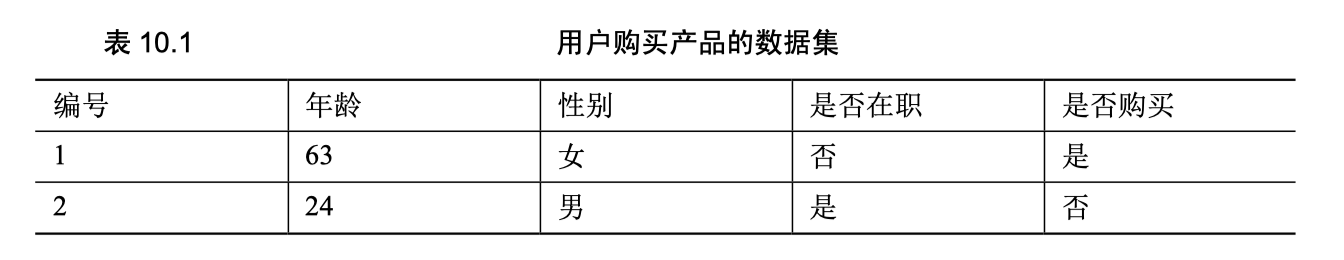

在本例中，我们的预测因子有年龄、性别和是否在职，响应值是是否购买。我们想知道给定客户的年龄、性别和在职状况后，客户是否会购买产品。

假设某模型经过以上数据训练后，能够准确预测客户的购买行为。虽然模型本身非常有意思，但还有其他更重要的事情值得关心。事实上，模型之所以能够做出准确的预测，恰恰说明以上变量之间存在着某种关系。换言之，如果我们想判断客户是否会购买商品，只需要知道客户的年龄、性别和在职状况3个信息即可。这些信息可能会和市场调研相矛盾—市场调研需要更多的信息才能对潜在客户行为进行预测。

这说明监督机器学习模型拥有理解预测因子和结果值是否存在关系，以及如何产生影响的能力。比如女性是否更倾向于购买该产品？商品对哪个年龄区间的用户没有吸引力？将年龄和性别两个因素结合在一起预测的效果，是否优于单独使用年龄或性别？随着用户年龄的增长，他们购买产品的概率是增长、下降，还是保持不变？

有时，机器学习模型可能只需要输入一列就能进行预测，其他列都是噪声(和结果值没有相关性，干扰模型的运行)。

##### 监督学习的类型
常见的监督学习模型有两种：`回归模型`(regression model)和`分类模型`(classification model)。两者的区别非常简单，只体现在响应变量的不同。

**回归模型**  
回归模型用于预测连续型响应变量，响应值可以取无穷大，比如预测以下内容。
+ 金额，如薪酬、预算等
+ 温度
+ 时间：通常可以精确到秒或分钟。

**分类模型**  
分类模型用于预测分类响应变量，响应变量只有有限个取值，比如回答以下问题。
+ 癌症级别
+ 真/假问题
+ 人脸识别

##### 案例：回归
下图展示了3个分类变量(年龄、出生年份和教育水平)与工资(周薪)之间的关系：
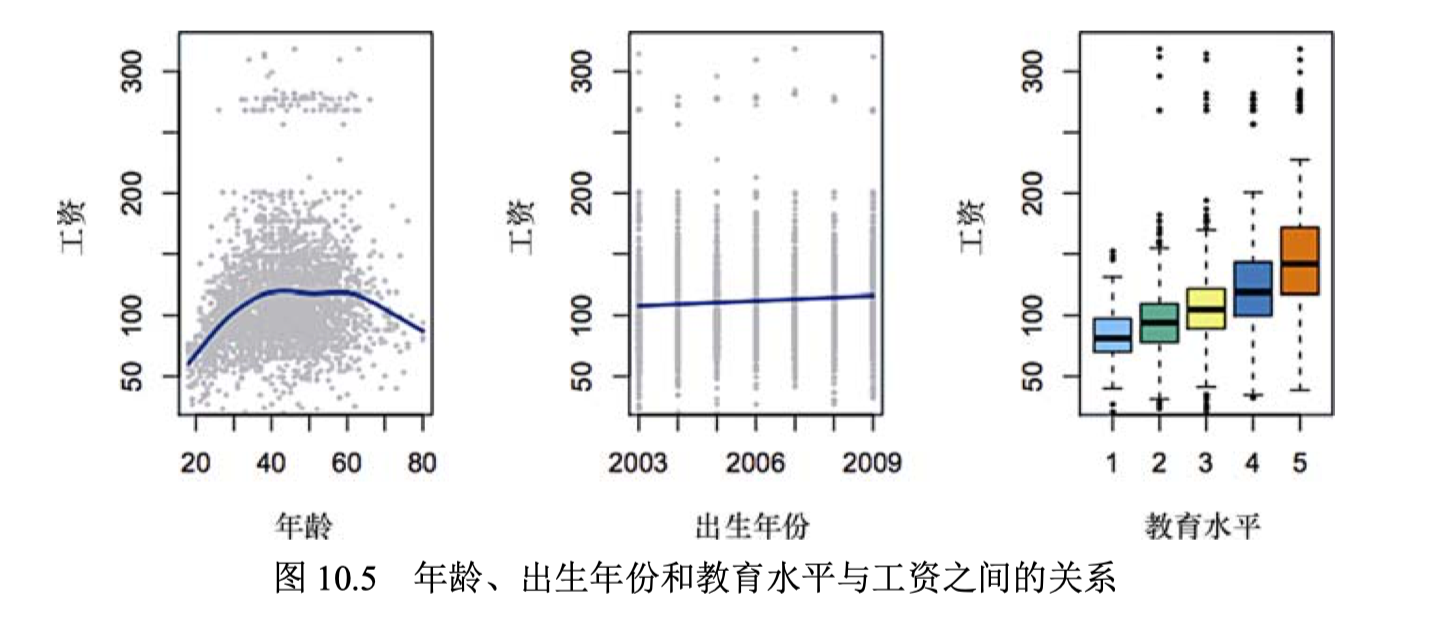

请注意，虽然每个预测因子都属于分类数据，但由于因变量$y$轴是连续型数据，所以本例使用的是回归模型。

### 10.4.2 无监督学习
`无监督学习`模型通过输入一系列预测因子，识别预测因子间隐藏的关系或模式，完成某项任务，比如：
+ 对特征变量进行缩减，降低数据集维度。如文件压缩，其工作原理是利用文件数据中的模式，以更小的格式表示数据
+ 从数据集中寻找行为模式相似的数据点

第1种任务通常叫作`降维`(dimension reduction)，第2种类型的任务通常叫作`聚类`(clustering)，两者都是无监督学习，因为模型没用利用预测因子对响应变量进行预测。与此相反，无监督学习模型的输出结果通常是我们事先不知道的内容。

图10.7是聚类模型的输出结果，颜色相同的数据点具有相似特征，颜色不同的数据点则互不相同：
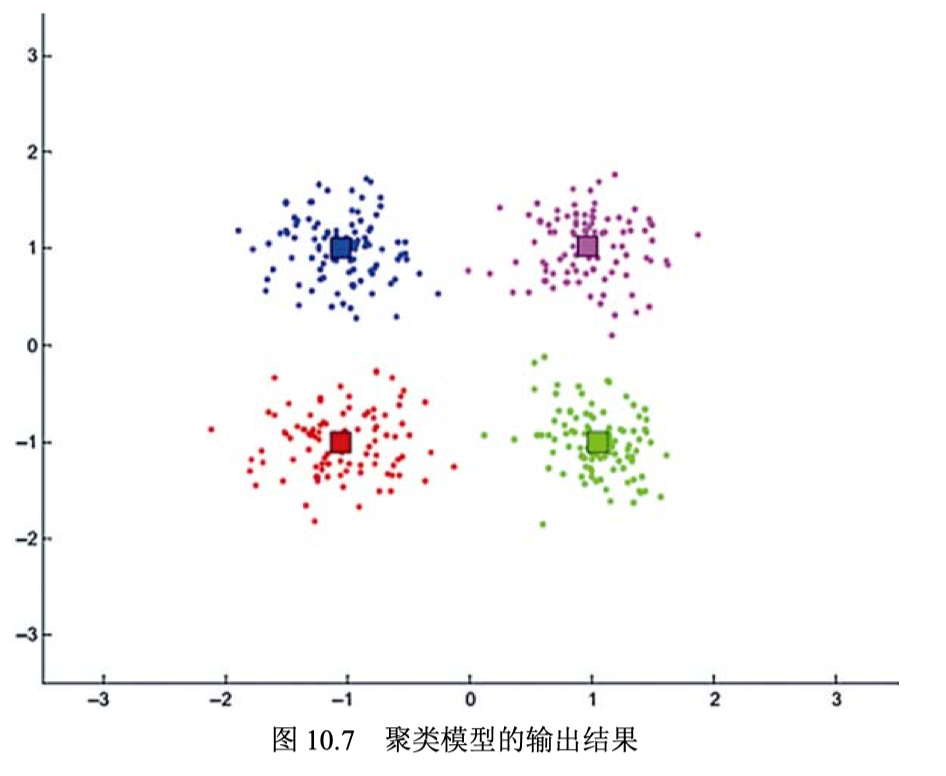

无监督学习模型的一个优势是它不需要标签数据，这意味着准备模型数据相对容易。但是标签数据缺失也导致模型失去了相应的预测能力。

无监督学习模型的另一个缺点是我们很难评价模型的执行效果。对于回归模型和分类问题，我们可以很容易将模型的执行效果和真实情况做对比。比如模型预测价格将上涨1美元，但实际上价格上涨了99美分，我们知道模型的预测结果非常接近真实值！对于无监督学习，我们没有真实值和模型执行结果进行对比，因此需要人对模型效果进行主观判断。

简单总结，无监督学习模型的主要用途是发现数据点的相似性和差异。

### 10.4.3 强化学习
在强化学习中，算法需要在特定环境中选择一种行为，并得到相应的奖励或惩罚。算法根据奖励或惩罚进行自我调整，通过改变策略完成某项目标—通常是得到更多奖励。

这种类型的机器学习在AI辅助类游戏中非常流行，它们作为AI助理，探索虚拟世界，收集奖项并学习最佳的完成方式。这种模型在机器人，特别是在自动化机械方面同样非常流行，比如自动驾驶汽车读取传感器的输入，并根据规则做出反应。汽车根据得到的奖励调整驾驶行为，以得到更多奖励。

强化学习和监督学习非常相似，因为算法会总结和分析过去的行为，以便在未来做出更好的行动。两者的主要区别在于奖励。奖励没有正确或不正确之分，仅仅是鼓励(或不鼓励)不同的行为。

### 10.4.4 机器学习种类概览
机器学习可以分为：监督学习、无监督学习和强化学习。
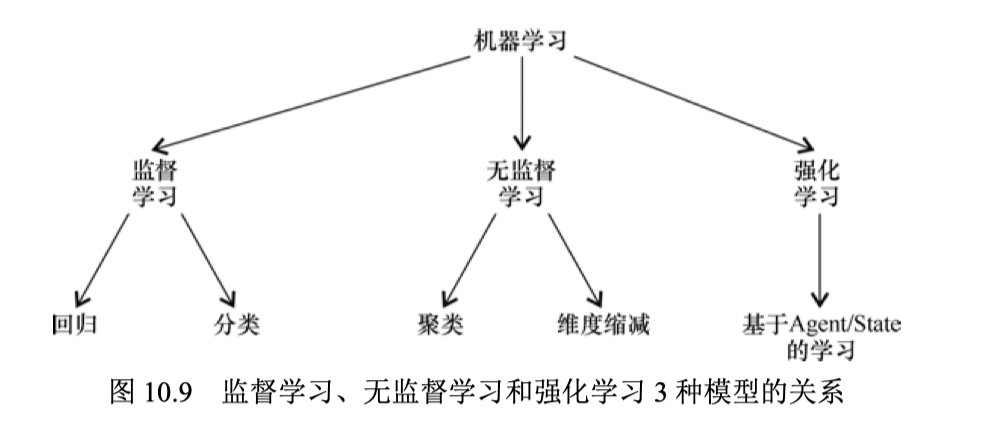

每一种类型的机器学习模型都有其优势和劣势：
+ 监督学习：它利用预测因子和被预测变量之间的关系，预测未来的观测值
    + 优势
        + 可以对未来进行预测
        + 可以量化预测因子和被预测对象之间的关系
        + 可以表示变量之间互相影响的强度
    + 劣势
        + 需要标签数据，而这些数据很难获得

+ 无监督学习：它用于识别数据点之间的相似性和差异
    + 优势
        + 可以从数据点中找出人类无法察觉的相似性，对数据点进行聚类
        + 可以是监督学习的前置处理步骤，比如对一批数据点进行聚类后，将聚类结果作为监督学习模型的预测结果
        + 可以使用无标签数据，而这些数据很容易获得
    + 无监督学习的劣势
        + 无法进行预测
        + 无法决定结果是否准确
        + 过多依赖于人的解释能力

+ 强化学习：它依赖于奖惩系统，鼓励模型在特定环境采取行动
    + 优势
        + 复杂的奖惩系统能够产生复杂的AI系统
        + 可以在任何环境中学习
    + 劣势
        + 模型在初期是不稳定的，在它意识到哪些选择会得到惩罚之前，它可能会做出糟糕的选择。比如，在自动驾驶模型没有因为汽车撞上墙而得到惩罚之前，它可能会让汽车撞上墙
        + 模型测试完所有的可能性需要花费一点时间
        + 模型只选择最安全的策略，因为它会极力避免得到惩罚



## 10.5 统计模型如何纳入以上分类
你可能好奇`统计学模型`在`机器学习`中扮演什么角色。 这个话题在数据科学领域还存有争议，但在我看来，统计学模型是机器学习模型的另一种说法，这些模型高度依赖概率论和统计学的数学原理，从变量中寻找关系。

接下来我们将重点介绍一种概率统计学模型—`线性回归模型`。

## 10.6 线性回归
`线性回归模型`是回归模型的一种，它是一种通过预测因子和响应变量之间的关系进行预测的机器学习模型。响应变量通常是连续型变量。模型会寻找最合适的拟合线。

在线性回归案例中，预测因子和响应变量之间的关系可以用数学公式表示如下：
+ $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

其中：
+ $y$是响应变量
+ $x_i$是第$i$个变量(第$i$列或第$i$个预测因子)
+ $\beta_0$是截距
+ $\beta_i$是第$i$个变量的相关系数

下面我们研究一个案例，用模型预测特定日期所需的共享单车数量。数据集来自Kaggle(https://www.kaggle.com/c/bike-sharing-demand/data)：

In [2]:
bikes = pd.read_csv("data/bikeshare.csv")
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


我们先用`temp`列(温度)和`count`列(租用量)做散点图：

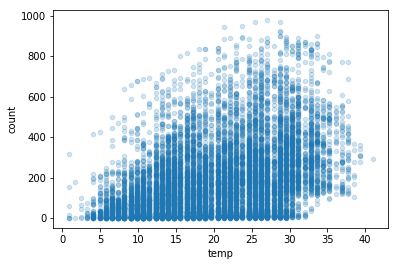

In [3]:
bikes.plot(kind='scatter', x='temp', y='count', alpha=0.2) 

接着我们使用`seaborn`模块绘制最佳拟合线：

/home/alex/3rd/py-venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


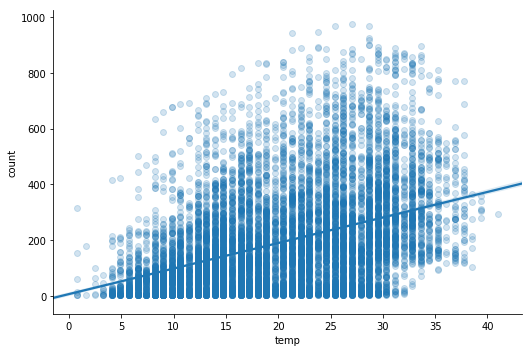

In [4]:
sns.lmplot(x='temp', y='count', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

图中的斜线是对`temp`列和`count`列关系的量化。通过温度就可以根据预测线的位置预测共享单车使用量。比如，`20℃`时预测线显示可能有`200`辆自行车被租用；`40℃`时自行车租用量将超过`400`辆！因此，表面上看起来共享单车租用量随气温的升高而增加。

我们用相关系数量化变量间的关系：

In [5]:
bikes[['count', 'temp']].corr()

,count,temp
count,1.000000,0.394454
temp,0.394454,1.000000


可见，两个变量有微弱的正相关关系！回到线性回归公式：
+ $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

模型试图绘制出由每个数据点组成的完美的预测线。但是，我们可以明显地看出，图中并不存在完美的预测线！因此模型将退而求其次，找出最佳拟合的预测线。理论上，我们可以画出很多条逼近数据点的线，但哪条线才是最好的呢？

如下图所示，在线性回归模型中，我们只需给定$x$和$y$，模型将找出最佳的`贝塔系数`(beta coefficients)，也叫做`模型系数`(model coefficients)：
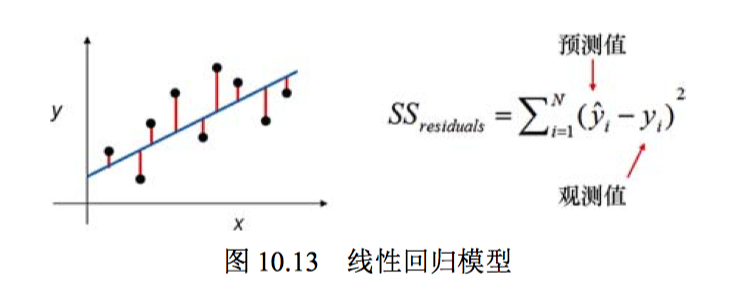

在图中：
+ 黑色点是观测值
+ 蓝色线是最佳拟合线
+ 把黑色点和蓝色线连接起来的红色线被称作`残差`(residual)，它们是观测值到拟合线的距离，也是拟合线偏离观测点的距离

每个数据点和最佳拟合线之间都有残差，对所有残差平方后再相加得到`残差平方和`(sum of squared residuals)，残差平方和最小的拟合线就是最佳拟合线。

我们用Python来计算最佳拟合线：

In [6]:
feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes['count']

linreg = LinearRegression()
linreg.fit(X, y)

linreg.intercept_, linreg.coef_

(6.046212959616611, array([9.17054048]))

截距$\beta_0 = 6.04$是当$x=0$时$y$的值。即当温度为`0℃`时被租用的共享单车数量。$\beta_0$约等于`6`说明温度为`0℃`时只有`6`辆自行车被租用。

> 有时候，截距可能并没有意义。回忆一下有关数据层次的相关内容，并不是所有数据等于0时都有意义。回到本例，温度为0℃时对应的共享单车租用量是有意义的数字。但请记住，以后你要经常问自己当某个变量为0时是否有意义

$\beta_1 = 9.17$是温度系数，如图所示：
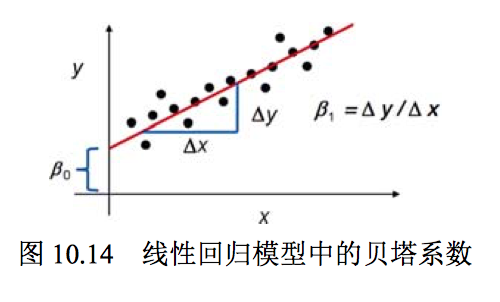

+ 它等于$y$的变化值除以$x_1$的变化值
+ 它表明了$X$和$y$如何同时变化
+ $\beta_1$约等于9，说明温度每升高`1℃`，共享单车租用量将增加`9`辆
+ 温度系数的符号非常重要。当它为负数时表明随着温度升高，共享单车租用量将下降

有必要再次强调一遍，线性回归模型中的贝塔系数体现的仅仅是变量之间的相关性，而不是因果关系。我们无法得出`温度的升高导致了自行车租用量增加`这样的结论，它们仅仅是向相同的方向变化而已。

接下来就可以使用模型进行预测：

In [7]:
linreg.predict(np.reshape(20, [1, 1]))

array([189.45702259])

### 10.6.1 增加更多预测因子
在修改模型之前，我们先研究一下数据集，搞清楚每个预测因子的含义。s
+ season：1表示spring、2表示summer、3表示fall、4表示winter
+ holiday：当天是否假期
+ workingday：当天是否周末或工作日
+ weather：
    - 1：晴天，少云
    - 2：薄雾，薄雾+阴天，薄雾+碎云，薄雾+少云
    - 3：小雪、小雨+散云，小雨+散云+雷电
    - 4：大雨+冰雹+雷电+薄雾，雪+浓雾
+ temp：温度
+ atemp：体感温度
+ humidity：空气湿度
+ windspeed：风速
+ casual：租客中未注册的人数
+ registered：租客中已注册的人数
+ count：租用量

我们先创建一个列表存储预测因子特征，再生成预测因子$X$和响应变量$y$，最后对线性回归模型进行拟合。一旦模型完成了拟合，就能清楚预测因子和响应变量间的关系：

In [8]:
# create a list of features
feature_cols = ['temp', 'season', 'weather', 'humidity'] 

# create X and y 
X = bikes[feature_cols] 
y = bikes['count']

# instantiate and fit 
linreg = LinearRegression() 
linreg.fit(X, y)

# pair the feature names with the coefficients 
list(zip(feature_cols, linreg.coef_))

[('temp', 7.86482499247745),
 ('season', 22.538757532466768),
 ('weather', 6.670302035923734),
 ('humidity', -3.118873382396501)]

这意味着保持其他预测因子不变的情况下：
+ 温度每增加1个单位，共享单车租用量增加7.86辆
+ 季节每增加1个单位，共享单车租用量增加22.5辆
+ 天气每增加1个单位，共享单车租用量增加6.67辆
+ 湿度每增加1个单位，共享单车租用量减少3.12辆

从结果看，随着天气逐渐变阴天，共享单车租用量在增加；随着季节逐渐接近冬天，共享单车租用量也在增加。这不太符合我们的预期！

下面我们来看每个预测因子和响应变量组成的散点图：

/home/alex/3rd/py-venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


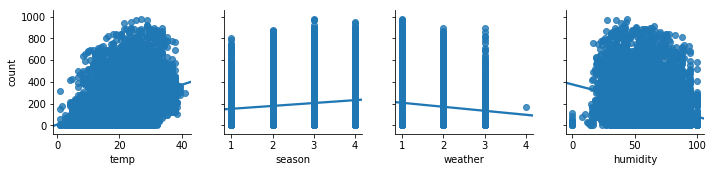

In [9]:
feature_cols = ['temp', 'season', 'weather', 'humidity'] 
# multiple scatter plots 
sns.pairplot(bikes, x_vars=feature_cols, y_vars='count', kind='reg') 

请注意天气的预测线呈向下趋势，这与模型得出的结果完全相反！我们开始怀疑哪些预测因子能够帮助我们预测，哪些预测因子是无用的噪声。为了进行区分，我们需要使用更高级的指标。

### 10.6.2 回归指标
线性回归模型有3种主要的指标：
+ 平均绝对误差(MAE)
+ 均方误差(MSE)
+ 均方根误差(RMSE)

以上指标的原理是通过将回归模型的预测因子和真实值进行比较，量化模型的有效性。但3个指标又略有差异，有不同的用途。 

平均绝对误差(MAE)是误差绝对值之和的平均值：
+ $\frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$

均方误差(MSE)是误差平方之和的平均值：
+ $\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$

均方根误差(RMSE)是误差平方之和的平均值的平方根：
+ $\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$

其中：
+ $n$是观测值的数量
+ $y_i$是实际值
+ $\hat{y_i}是预测值$

用Python计算以上指标：

In [10]:
# example true and predicted response values 
true = [9, 6, 7, 6] 
pred = [8, 7, 7, 12] 

print('MAE:', metrics.mean_absolute_error(true, pred))
print('MSE:', metrics.mean_squared_error(true, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

MAE: 2.0
MSE: 9.5
RMSE: 3.082207001484488


以下是对各指标的解释：
+ 平均绝对误差(MAE)比较容易理解，它是模型误差的平均值
+ 均方误差(MSE)比平均绝对误差(MAE)更有使用价值，因为误差越大，在均方误差(MSE)中占有的权重越大
+ 均方根误差(RMSE)比均方误差(MSE)的应用更广，因为它容易解释和说明

对于回归模型，推荐使用均方根误差(RMSE)。但是无论使用何种指标，它们都属于`损失函数`(loss functions)，因此，值越小越好。

下面我们用均方根误差(RMSE)判断哪些列有助于预测，哪些列干扰了预测。首先从温度开始：

In [11]:
feature_cols = ['temp'] 
X = bikes[feature_cols] 

linreg = LinearRegression() 
linreg.fit(X, y) 
y_pred = linreg.predict(X) 

np.sqrt(metrics.mean_squared_error(y, y_pred))

166.44886243326746

同时使用温度和湿度进行预测：

In [12]:
feature_cols = ['temp', 'humidity'] 
X = bikes[feature_cols] 

linreg = LinearRegression() 
linreg.fit(X, y) 
y_pred = linreg.predict(X) 

np.sqrt(metrics.mean_squared_error(y, y_pred))

157.7992451452858

可以看到指标变小了！继续使用更多变量进行预测：

In [13]:
feature_cols = ['temp', 'humidity', 'season', 'holiday', 'workingday', 'windspeed', 'atemp']
X = bikes[feature_cols] 

linreg = LinearRegression() 
linreg.fit(X, y) 
y_pred = linreg.predict(X) 

np.sqrt(metrics.mean_squared_error(y, y_pred))

155.75989143430357

指标变得更小！表面上看，我们的模型越来越好，但实际上面临着一个风险。我们首先用$X$和$y$对模型进行训练，接着让模型根据$X$进行预测，它会导致模型`过拟合`(overfitting)。

一种解决过拟合的方法是使用独立的训练数据集和测试数据集，工作原理如下：
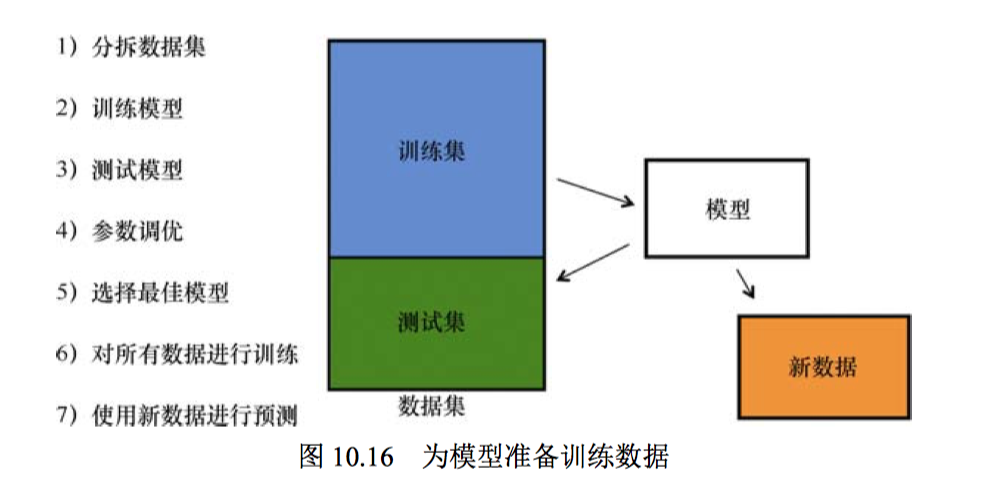

我们的目的是最小化模型对从未接触过的新数据的预测误差。这一点至关重要，因为监督模型最重要的用途是对未知情况进行预测。

使用`scikit-learn`模块可以完成这项工作：

In [14]:
feature_cols = ['temp'] 
X = bikes[feature_cols] 
y = bikes['count']

X_train, X_test, y_train, y_test = train_test_split(X, y)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test) 
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

164.3117073651534

我们在模型中添加更多特征进行预测：

In [15]:
feature_cols = ['temp', 'workingday'] 
X = bikes[feature_cols] 
y = bikes['count']

X_train, X_test, y_train, y_test = train_test_split(X, y) 

linreg = LinearRegression() 
linreg.fit(X_train, y_train) 
y_pred = linreg.predict(X_test) 

np.sqrt(metrics.mean_squared_error(y_test, y_pred))

166.17620446904982

模型在加入新的预测因子后，预测效果反而变得更糟。这说明变量`workingday`不是预测共享单车租用量的有效特征。

即便如此，我们如何知道模型的预测能力是否已经足够好了呢？模型的均方根误差接近167辆，这个数字真的好吗？一种评价模型优劣的方法是使用`空模型`(null model)。

监督学习中的空模型指完全靠瞎猜得到的预测结果。对于回归模型，如果我们将每小时平均共享单车租用量作为瞎猜的结果，模型的预测效果如何呢？

首先，我们计算平均每小时共享单车租用量，如下所示：

In [16]:
average_bike_rental = bikes['count'].mean() 
average_bike_rental

191.57413191254824

这意味着如果不考虑天气、时间、周末、体感温度等因素，平均每小时自行车租用量是192辆。

下面我们做一个假的预测结果集，每一次的预测结果都是`191.57`：

In [17]:
num_rows = bikes.shape[0] 
num_rows

null_model_predictions = [average_bike_rental]*num_rows 

现在我们有`10886`个相等的值，我们计算空模型(纯粹靠瞎猜)的均方根误差：

In [18]:
np.sqrt(metrics.mean_squared_error(y, null_model_predictions))

181.1361335742659

空模型的均方根误差是181辆。我们仅仅使用了两个特征，模型的预测准确率就可以击败空模型。

下面将介绍另一个重要的机器学习模型`Logistic模型`。`Logistic回归模型`有点像回归模型的兄弟，它们的核心思想非常相似，但具体用途略有差异。回归模型用于预测连续型数值，Logistic回归模型则用于根据特征对数据点进行分类，属于分类模型。

## 10.7 Logistic回归
`Logistic回归模型`是线性回归模型的泛化，用以解决分类问题。`线性回归模型`使用一系列定量特征预测连续型响应变量，而`Logistic回归模型`使用一系列定量特征预测观测对象属于某一分类的概率。概率又可以映射到类型标签，最终实现对观测对象进行分类。

使用线性回归模型时，我们用以下函数进行拟合：
+ $y = \beta_0 + \beta_1x$

其中，$y$是响应变量，$\beta$是模型的参数，$x$是输入的变量。

简单来说，假设待解决的分类问题有一个叫`类别1`的分类，那么我们用以下函数生成Logistic模型：
+ $P(y = 1 | x) = \frac{e^{\beta_0 + \beta_1x}}{1 + e^{\beta_0 + \beta_1x}}$

其中，$P(y = 1 | x)$表示给定数据$x$的前提下，响应变量属于`类别1`的条件概率。函数右边的部分叫作Logistic函数，它很神奇！$e$是`欧拉常数`(Euler’ snumber)，约等于`2.718`。它经常用来对自然增长或衰减的事物进行建模。

为什么不能用线性回归公式直接预测数据点属于哪个分类的概率呢？最大的原因是线性回归模型预测的对象是连续型变量，即模型假设$y$是连续的。在本例中，$y$是某事件发生的概率，虽然也是一个连续变量，但它仅仅是连续区间而已—$y$值只能介于`0～1`。线性回归的预测范围远远超过`0～1`，显然概率不能等于这些值。我们希望模型的预测结果恰好介于`0～1`，就像真实的概率分布一样。

另一个原因则偏向理论化。使用线性回归模型时存在一些假设前提，最重要的假设是概率和特征之间存在线性关系。但实际上，我们更倾向于使用平滑曲线，而不是一条枯燥的线表示概率。我们需要更合理的回归方法。因此，让我们再回顾一下概率论。

## 10.8 概率、几率和对数几率
概率等于事件发生的次数除以所有可能的结果。假设有3000人进入商店，其中1000人进行了购物，那么任意一人购物的概率是：
+ $P(购物) = \frac{1000}{3000}  = 33.3%$

与此同时，我们还有另一个相关的概念叫作`几率`(odds)。`几率`等于事件发生的次数除以其他所有可能的结果，而不是所有可能的结果。在同样的例子中，任意一人购物的几率是：
+ $Odds(购物) = \frac{1000}{2000} = 50%$

这意味着每成功转化1名客户购物，都有2名客户没有转化成功。

这两个概念有很大关联，甚至有一个公式对它们进行转换：
+ $Odds = \frac{P}{1-P}$

我们用Python计算一组概率和概率对应的几率：

In [19]:
# create a table of probability versus odds 
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]}) 
table['odds'] = table.probability/(1 - table.probability) 
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


从结果看出，几率随着概率增加，且增加的速度更快！事实上，当概率接近1时，几率接近正无穷大。我们之前曾说，无法用线性回归模型预测概率的原因是线性回归模型的预测结果可以逼近无穷小和无穷大，导致预测的概率不正确。那可不可以对几率进行回归预测呢？事实上，虽然几率的取值范围逼近正无穷，但几率永远大于0。因此，我们仍然无法对概率和几率进行线性回归预测。看起来我们陷入了僵局。

等等！自然数和对数也许能拯救我们！`Python`中`np.log`可以自动计算所有以$e$为底的对数：

In [20]:
np.log(10) # e^2.302 = 10

2.302585092994046

In [21]:
2.71828**2.3025850929940459

9.999984511610785

我们更进一步，计算概率对应的几率和对数几率(`Log-odds`，也称为`Logit`)：

In [22]:
table['logodds'] = np.log(table.odds) 
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


对数几率看起来既可以大于0，也可以小于0；对数几率既没有上界，也没有下界。它是线性回归最佳的响应变量。事实上，这正是`Logistic`回归的起点。

##### Logistic回归的数学原理
简单来说，Logistic回归是一种线性回归，它用特征$X$预测观测对象属于某一特定类别的对数几率。

假设$p$表示数据点属于特定类别的概率，那么Logistic回归的公式可以表示为：
+ $\log_e (\frac{p}{1-p}) = \beta_0 + \beta_1x$

求解变量$p$，得到的就是Logistic函数，它的图形呈S形，$y$轴的值介于`0～1`：
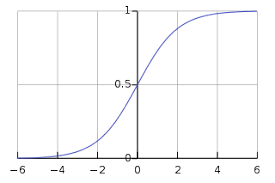

+ $P = \frac{e^{\beta_0 + \beta_1x}}{1 + e^{\beta_0 + \beta_1x}}$

上图体现了Logistic函数的特征，它能将任何连续型变量$x$，通过平滑的概率曲线映射到最小为0、最大为1的概率区间上。

换句话说：
+ Logistic回归的输出结果是数据点属于某一特定类别的概率
+ 这些概率可以被转化为分类预测

Logistic函数还有一些属性，比如：
+ 呈S形曲线
+ 输出结果介于0～1，符合概率的分布区间

为了更好地理解Logistic函数，我们必须理解概率和几率的区别。几率等于事件的概率除以互补事件的概率：
+ $Odds = \frac{P}{1-P}$

在线性回归中，参数$\beta_1$表示$x$发生1单位变化，响应变量的变化值。在Logistic回归中，$\beta_1$表示$x$发生1单位变化，对数几率的变化值；$e^{\beta_1}$表示$x$发生1单位变化，几率的变化值。

假设我们研究手机购买行为，变量$y$是分类标签`购买`或`未购买`，变量$x$表示手机品牌是否为iPhone。假设我们使用Logistic回归模型，参数$\beta_1 = 0.693$。因此，我们可以计算几率为`np.exp(0.693)=2`，也就是说手机品牌为iPhone的购买几率是其他品牌的两倍。

> 我们介绍的大部分案例都是二元分类，即预测结果只有一到两种情况。实际上，通过使用一对多方法，Logistic回归可以预测出更多结果，即模型可以计算多个响应变量的概率曲线

回到共享单车租赁案例，我们使用`scikit-learn`模块进行`Logistic回归`。我们新建一个分类响应变量。为了简化起见，假设该列叫`above_average`，表示每个小时自行车租用量是否高于平均值：

In [23]:
# Make a cateogirical response 
bikes['above_average'] = bikes['count'] >= average_bike_rental

正如前面所说，我们需要和空模型进行对比：
+ 对于回归问题，空模型通常将平均值作为预测结果
+ 对于分类问题，空模型通常将最常出现的类别作为预测结果

统计每个类别出现的次数，结果显示，接近`60%`的时间共享单车租用量都低于平均值：

In [24]:
bikes['above_average'].value_counts(normalize=True)

False    0.599853
True     0.400147
Name: above_average, dtype: float64

我们用Logistic回归模型预测指定时间的共享单车租用量是否高于平均值：

In [25]:
feature_cols = ['temp']
X = bikes[feature_cols] 
y = bikes['above_average']

X_train, X_test, y_train, y_test = train_test_split(X, y)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

/home/alex/3rd/py-venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6620132255694342

结果显示，仅仅使用温度特征，模型的预测准确度就高于空模型。这是模型优化的第一步。

对于线性回归和Logistic回归，大家可能还有一个疑问，这两个模型都只能使用定量数据列(定量特征)进行预测，如果我们已经知道某个分类特征和响应变量之间有关联，该怎么办呢？

## 10.9 哑变量
当我们希望将分类特征转换为定量特征时，就要用到`哑变量`(dummy variables)。我们曾经介绍过两种分类特征：定类尺度和定序尺度。定序尺度特征有自然的顺序，而定类尺度特征则没有。

哑变量指定性数据被重新编码后的新数据，它将定性数据的每个值转换为由`真`(1)或`假`(0)组成的新数据。

比如，假设数据集某一列存储了学校专业名称，我们希望在线性或Logistic回归模型中使用这些信息，但前提是它们必须是数字类型而不是文本类型。初始列有4个不同的专业：
+ Computer Science
+ Engineering
+ Business
+ Literature

经过转换后得到以下3列(删除了`Computer Science`列)：
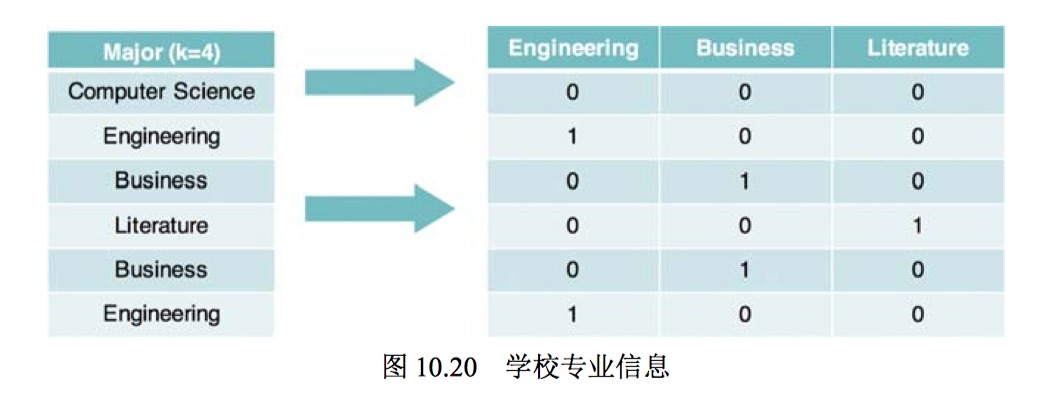

请注意，第1行中每1列都等于0，这意味着该行对应的学生不属于`Engineering`、`Business`和`Literature`中任何一个专业。第2行`Engineering`列等于1，说明该行对应的学生属于`Engineering`专业。

回到共享单车租赁案例，我们新增一列`when_is_it`，它的值有以下4种可能：
+ 上午(Morning)
+ 下午(Afternoon)
+ 高峰时间(Rush_hour)
+ 空闲时间(Off_hours)

为了计算`when_is_it`，我们需要首先增加一列表示时间的列，再利用该列判断处于一天中哪个时间段，最后研究`when_is_it`列能否帮我们预测`above_average`列。

In [26]:
bikes['hour'] = bikes['datetime'].apply(lambda x:int(x[11]+x[12]))
# make a column that is just the hour of the day 
bikes['hour'].head()

0    0
1    1
2    2
3    3
4    4
Name: hour, dtype: int64

我们将上午5点至上午11点定义为上午，上午11点至下午4点定义为下午，下午4点至下午6点定义为高峰时间，剩下的时间段定义为空闲时间：

In [27]:
# this function takes in an integer hour and outputs one of our four options 
def when_is_it(hour):
    if hour >= 5 and hour < 11:
        return "morning" 
    elif hour >= 11 and hour < 16:
        return "afternoon" 
    elif hour >= 16 and hour < 18:
        return "rush_hour" 
    else:
        return "off_hours"

bikes['when_is_it'] = bikes['hour'].apply(when_is_it) 
bikes[['when_is_it', 'above_average']].head()

,when_is_it,above_average
0,off_hours,False
1,off_hours,False
2,off_hours,False
3,off_hours,False
4,off_hours,False


我们先通过可视化分析每天这4个时间段的自行车出租情况。用条形图表示每个时间段，柱子的高度表示该时间段的共享单车出租量高于平均出租量的概率：

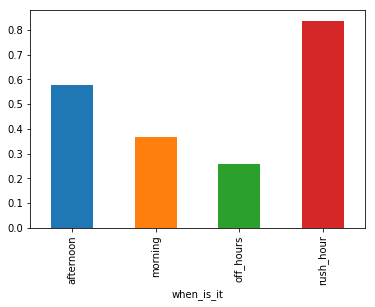

In [28]:
bikes.groupby('when_is_it').above_average.mean().plot(kind='bar')

各时间段的出租量有较大的差异！空闲时段自行车出租量高于平均值的概率是`25%`，高峰时段共享单车出租量高于平均值的概率是`80%`！下面我们用Python内置的工具生成哑变量：

In [29]:
when_dummies = pd.get_dummies(bikes['when_is_it'], prefix='when__') 
when_dummies.head()

,when___afternoon,when___morning,when___off_hours,when___rush_hour
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [30]:
# remove the first column
when_dummies = when_dummies.iloc[:, 1:]
when_dummies.head()

,when___morning,when___off_hours,when___rush_hour
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


我们已经将分类特征转换为数值型，下面就可以使用Logistic回归模型：

In [31]:
X = when_dummies
y = bikes.above_average

X_train, X_test, y_train, y_test = train_test_split(X, y)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

/home/alex/3rd/py-venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6836884643644379

模型的预测效果比单独使用温度特征好多了！再加入温度特征和湿度特征：

In [32]:
new_bike = pd.concat([bikes[['temp', 'humidity']], when_dummies], axis=1)

X = when_dummies
y = bikes.above_average

X_train, X_test, y_train, y_test = train_test_split(X, y)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

/home/alex/3rd/py-venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6873622336517267